In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from scipy.stats import fisher_exact
from scipy.stats import pointbiserialr
from scipy.stats import ttest_ind

In [63]:
path = "C:/All/Other/bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(path, sep=',')

<h1>ЗАДАЧА РЕГРЕСИИ<h1>

array([[<Axes: title={'center': 'account length'}>,
        <Axes: title={'center': 'number vmail messages'}>,
        <Axes: title={'center': 'total day minutes'}>,
        <Axes: title={'center': 'total day calls'}>],
       [<Axes: title={'center': 'total day charge'}>,
        <Axes: title={'center': 'total eve minutes'}>,
        <Axes: title={'center': 'total eve calls'}>,
        <Axes: title={'center': 'total eve charge'}>],
       [<Axes: title={'center': 'total night minutes'}>,
        <Axes: title={'center': 'total night calls'}>,
        <Axes: title={'center': 'total night charge'}>,
        <Axes: title={'center': 'total intl minutes'}>],
       [<Axes: title={'center': 'total intl calls'}>,
        <Axes: title={'center': 'total intl charge'}>,
        <Axes: title={'center': 'customer service calls'}>, <Axes: >]],
      dtype=object)

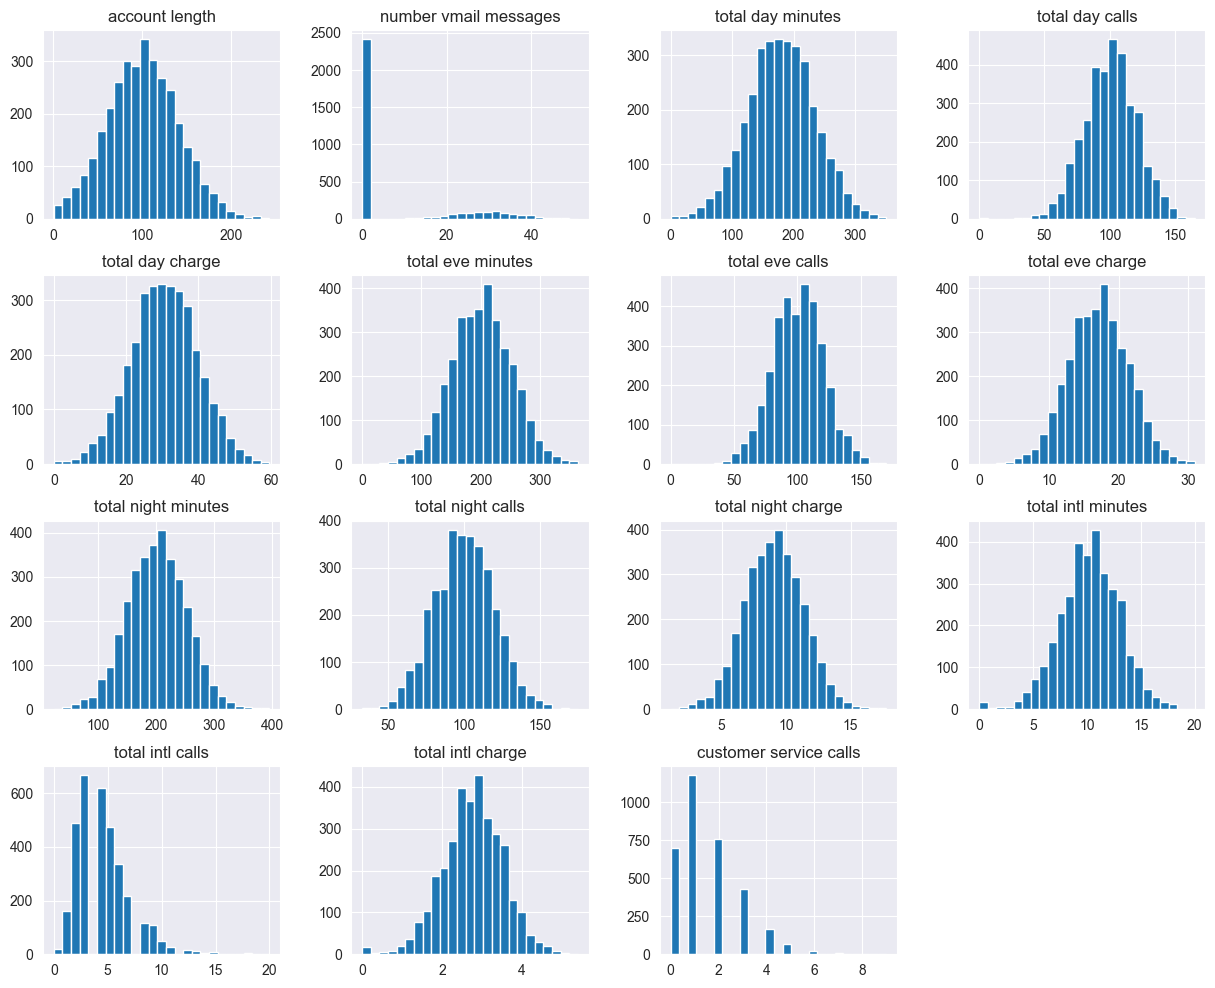

In [64]:
df.drop(columns = ['area code']).hist(figsize=(15, 12), bins=25)

<h1>Data cleaning & Analyzing relationships<h1>

In [65]:
df['state'] = df['state'].astype('string')

In [66]:
df = df.drop(columns=['phone number'])

In [67]:
columns_to_fix = df[['international plan', 'voice mail plan']]

for column in columns_to_fix:
    df[column] = df[column].map({'yes': True, 'no': False})

In [69]:
num_cols = df.select_dtypes(include=['int64', 'float64', 'bool']).columns
df_num = df[num_cols]
corr_matrix = df_num.corr()

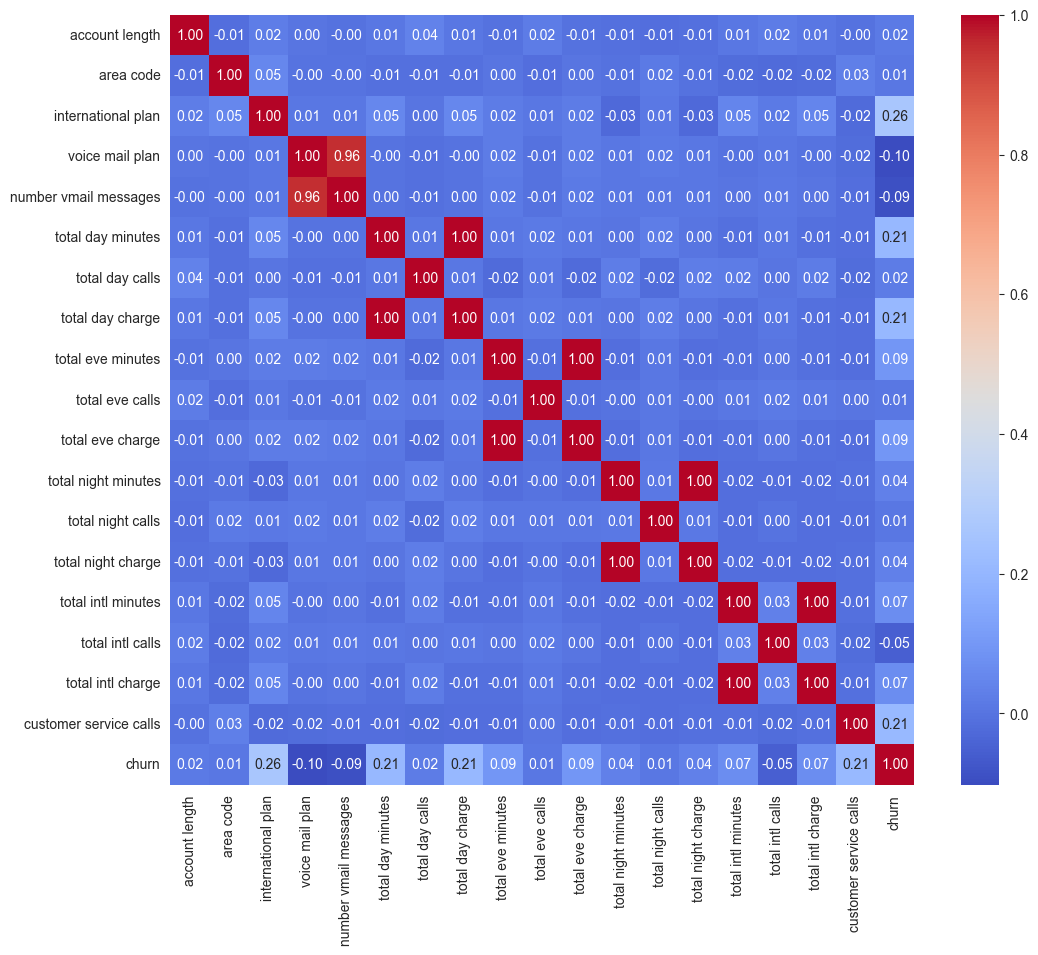

In [70]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [71]:
corr_matrix_abs = corr_matrix.abs()

np.fill_diagonal(corr_matrix_abs.values, 0)
max_corr = corr_matrix_abs.max().max()
max_pair = np.where(corr_matrix_abs == max_corr)
feature1 = corr_matrix_abs.index[max_pair[0][0]]
feature2 = corr_matrix_abs.columns[max_pair[1][0]]

print(feature1)
print(feature2)
print(max_corr)

total day minutes
total day charge
0.9999999521904007


In [72]:
for col in df.columns:
    if "total" in col.lower():
        corr, p_value = spearmanr(df["churn"], df[col])
        print(f"{col}: corr = {corr:.4f}, p_value = {p_value:.10f}")

total day minutes: corr = 0.1707, p_value = 0.0000000000
total day calls: corr = 0.0263, p_value = 0.1288408365
total day charge: corr = 0.1707, p_value = 0.0000000000
total eve minutes: corr = 0.0886, p_value = 0.0000003011
total eve calls: corr = 0.0086, p_value = 0.6205535359
total eve charge: corr = 0.0886, p_value = 0.0000003022
total night minutes: corr = 0.0343, p_value = 0.0474219966
total night calls: corr = 0.0047, p_value = 0.7864613257
total night charge: corr = 0.0344, p_value = 0.0473531183
total intl minutes: corr = 0.0609, p_value = 0.0004398188
total intl calls: corr = -0.0748, p_value = 0.0000155754
total intl charge: corr = 0.0609, p_value = 0.0004398188


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   string 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   bool   
 4   voice mail plan         3333 non-null   bool   
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [74]:
corr, p_value = spearmanr(df["churn"], df['state'])
print(f"{col}: corr = {corr:.4f}, p_value = {p_value:.10f}")

churn: corr = 0.0064, p_value = 0.7138942313


In [75]:
df = df.drop('state', axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   bool   
 3   voice mail plan         3333 non-null   bool   
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [77]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   bool   
 3   voice mail plan         3333 non-null   bool   
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [79]:
bool_cols = df.select_dtypes(include=bool).columns
df[bool_cols] = df[bool_cols].astype(int)

In [80]:
from sklearn.model_selection import train_test_split
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [82]:
y_pred = knn.predict(X_valid)

In [83]:
print(y_valid[:10], y_pred[:10])

438     0
2674    0
1345    1
1957    0
2148    0
3106    0
1786    0
321     0
3082    0
2240    0
Name: churn, dtype: int64 [0 0 0 0 0 0 0 0 0 0]


In [84]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_valid, y_pred))

0.8657074340527577


<h2>Налаштування оптимальної кількості найближчих
сусідів у методі kNN<h2>

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

In [86]:
X_train, X_valid, y_train, y_valid = train_test_split(X_st, y, test_size=0.25, random_state=4)

In [87]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [88]:
y_pred = knn.predict(X_valid)

In [89]:
print(accuracy_score(y_valid, y_pred))

0.8992805755395683


<h2>Налаштування гіперпараметрів. Валідаційна крива<h2>

In [90]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [122]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.85907046 0.86656672 0.86356822 0.88288288 0.85585586]
0.8655888272080177


In [93]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, {'n_neighbors': np.arange(1, 50, 2)}, cv=kf, scoring='accuracy')
knn_grid.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': array([ 1, 3..., 45, 47, 49])}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,np.int64(5)


In [94]:
knn_grid.best_estimator_

,n_neighbors,np.int64(5)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [95]:
knn_grid.best_params_

{'n_neighbors': np.int64(5)}

In [96]:
knn_grid.best_score_

np.float64(0.8831575150300601)

In [97]:
best_knn = knn_grid.best_estimator_
y_pred = best_knn.predict(X_valid)

In [98]:
print(accuracy_score(y_valid, y_pred))

0.8992805755395683


In [99]:
accuracy_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    accuracy_scores.append(accuracy)

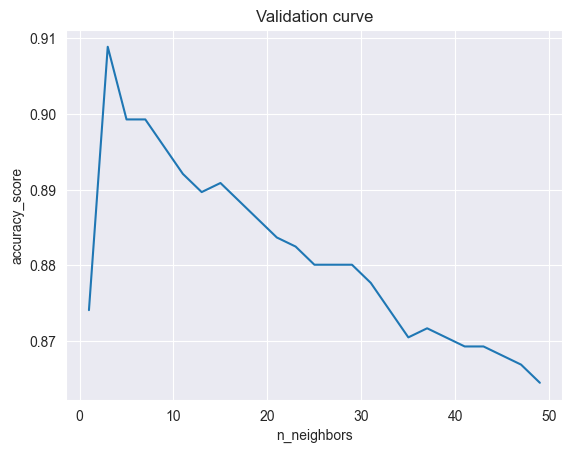

In [100]:
import matplotlib.pyplot as plt
plt.plot(list(range(1, 50, 2)), accuracy_scores)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy_score')
plt.title('Validation curve')
plt.show()

In [101]:
best_k = 5

Best p = 1.0
accuracy = 0.8728


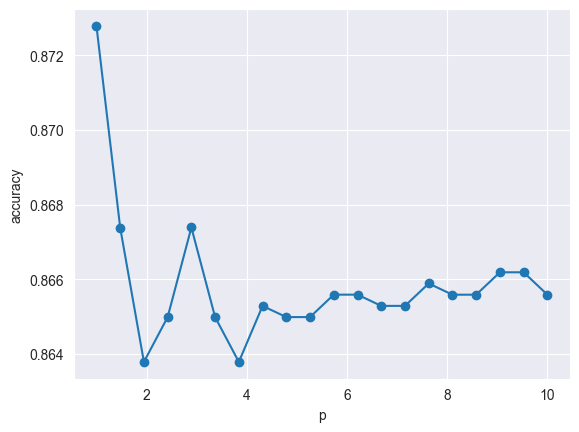

In [102]:
p_values = np.linspace(1, 10, 20)

knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

grid = GridSearchCV(knn, {"p": p_values}, cv=kf, scoring="accuracy")
grid.fit(X_train, y_train)
grid.fit(X, y)

best_p = grid.best_params_["p"]
best_score = grid.best_score_

print(f"Best p = {best_p}")
print(f"accuracy = {best_score:.4f}")

plt.plot(p_values, grid.cv_results_["mean_test_score"], marker="o")
plt.xlabel("p")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

In [103]:
p_values = np.linspace(1, 10, 20)

knn = KNeighborsClassifier(weights='distance')

grid = GridSearchCV(knn, {'n_neighbors':np.arange(1, 50, 2),"p": p_values}, cv=kf, scoring="accuracy")
grid.fit(X_train, y_train)
grid.fit(X, y)

best_p = grid.best_params_["p"]
best_score = grid.best_score_

print(f"Best p = {best_p}")
print(f"k = {best_k:.4f}")
print(f"accuracy = {best_score:.4f}")

Best p = 1.4736842105263157
accuracy = 5.0000
accuracy = 0.8797


In [104]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=best_p)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)

In [111]:
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.86956522 0.86956522 0.86656672 0.88138138 0.84984985]
0.8673856765311039
